<a href="https://colab.research.google.com/github/Medilan8D/ThisIsMyFirstRepo/blob/main/diabetic_patient_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#standardization
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,auc

In [7]:
diabetes_dataset=pd.read_csv('/content/diabetes.csv')
print(diabetes_dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [9]:
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset.describe()

In [11]:
diabetes_dataset['Outcome'].value_counts()
#0 non diabetic
#1 diabetic

,count
Outcome,
0,500
1,268


In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#separating attributes and labels
x=diabetes_dataset.drop(columns='Outcome', axis=1)
y=diabetes_dataset['Outcome']

In [14]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#scaling the data = standardise
scaler=StandardScaler()
scaler.fit(x)
standardized_data=scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
df=pd.DataFrame(standardized_data)
print(round(df.describe(),2))

            0       1       2       3       4       5       6       7
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean    -0.00   -0.00    0.00    0.00   -0.00    0.00    0.00    0.00
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00
min     -1.14   -3.78   -3.57   -1.29   -0.69   -4.06   -1.19   -1.04
25%     -0.84   -0.69   -0.37   -1.29   -0.69   -0.60   -0.69   -0.79
50%     -0.25   -0.12    0.15    0.15   -0.43    0.00   -0.30   -0.36
75%      0.64    0.61    0.56    0.72    0.41    0.58    0.47    0.66
max      3.91    2.44    2.73    4.92    6.65    4.46    5.88    4.06


In [17]:
x=standardized_data
y=diabetes_dataset['Outcome']

In [ ]:
print(x)
print(y)

In [18]:
#Splitting the data
[x_train,x_test,y_train,y_test]=train_test_split(x,y,test_size=0.70,stratify=y,random_state=2)
print(x.shape,x_train,x_test)

(768, 8) [[ 0.93691372 -0.49745345 -3.57259724 ... -4.06047387 -0.50398624
  -0.78628618]
 [-0.54791859 -0.59134489  0.87340925 ...  1.71435179 -1.04156736
  -0.87137393]
 [ 0.63994726 -0.56004775 -0.16054575 ... -0.97633621 -0.67311288
  -0.36084741]
 ...
 [ 0.04601433  0.84832379 -0.47073225 ... -0.13866919 -0.97210463
  -0.36084741]
 [ 0.04601433 -0.27837344  0.45982725 ...  0.94014439 -0.71237443
   0.40494237]
 [ 2.12477957  1.06740381  0.35643175 ...  0.165937    2.66109814
   1.51108316]] [[-0.25095213 -0.46615631 -0.78091875 ... -0.13866919 -0.54324778
  -0.78628618]
 [ 0.93691372 -0.05929342 -3.57259724 ... -0.86210889 -0.79391763
   0.31985461]
 [ 0.93691372  0.66054092  1.08020025 ... -0.20212881 -1.03854724
   0.83038113]
 ...
 [ 1.53084665  0.03459802 -0.67752325 ...  0.165937    1.93928977
  -0.0204964 ]
 [ 1.82781311  0.03459802  0.45982725 ... -0.5575027   0.12117833
   1.00055664]
 [ 0.93691372  0.47275805  0.25303625 ... -0.76057349  0.52889435
   1.51108316]]


In [19]:
classifier=svm.SVC(kernel='linear')

In [20]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [21]:
x_train_data_predict=classifier.predict(x_train)
x_train_accuracy=accuracy_score(x_train_data_predict,y_train)
x_train_precision=precision_score(x_train_data_predict,y_train)
x_train_recall=recall_score(x_train_data_predict,y_train)
x_train_confusion_matrix=confusion_matrix(x_train_data_predict,y_train)
x_train_f1_score=f1_score(x_train_data_predict,y_train)
print(x_train_accuracy)
print(x_train_precision)
print(x_train_recall)
print(x_train_confusion_matrix)
print(x_train_f1_score)

0.7608695652173914
0.4875
0.7358490566037735
[[136  41]
 [ 14  39]]
0.5864661654135338


In [22]:
print(classification_report(x_train_data_predict,y_train))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       177
           1       0.49      0.74      0.59        53

    accuracy                           0.76       230
   macro avg       0.70      0.75      0.71       230
weighted avg       0.81      0.76      0.78       230



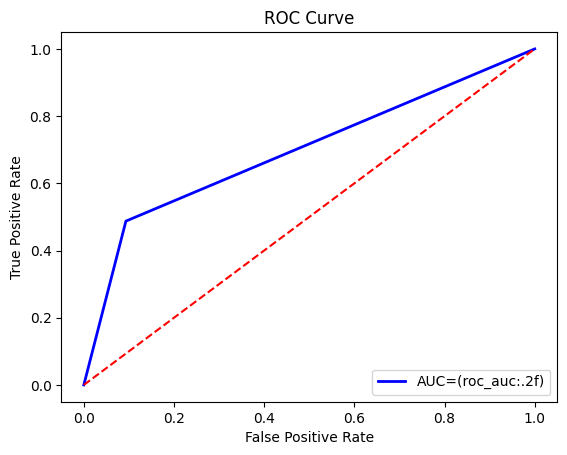

In [23]:
fpr,tpr,_=roc_curve(y_train,x_train_data_predict)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="blue",lw=2,label=f"AUC=(roc_auc:.2f)")
plt.plot([0,1],[0,1],color="red",linestyle="dashed")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [26]:
#now making a predictive model
input_data = (8,183,64,0,0,23.3,0.672,32)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Scale the input data using the same scaler
scaled_input_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(scaled_input_data)

print(prediction)
if (prediction[0] == 0):
  print("The person does not have diabetes.")
else:
  print("The person has diabetes.")

[1]
The person has diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
